## Load Data

In [36]:
import pandas as pd

# Load data
data = pd.read_csv('nor_constant_c.csv')
X = data.iloc[:, :-1]  # 마지막 열을 제외한 모든 열
y = data.iloc[:, -1]   # 마지막 열

In [37]:
print(X.head())
print(y.tail())

   std_dev_out_c  std_dev_in_c  avg_out_c  avg_in_c  in_pack_num_c  \
0         0.4936        0.0225     0.6810    0.0494         0.0272   
1         0.3388        0.0223     0.8419    0.0631         0.0175   
2         0.4748        0.0192     0.6887    0.0496         0.0264   
3         0.4954        0.0165     0.6836    0.0471         0.0274   
4         0.4572        0.0172     0.6881    0.0408         0.0257   

   out_pack_num_c  in_pack_ratio_c  out_pack_ratio_c  total_pack_num_c  \
0          0.1318           0.1153            0.8847            0.1379   
1          0.0427           0.2600            0.7400            0.0471   
2          0.1256           0.1195            0.8805            0.1315   
3          0.1343           0.1132            0.8868            0.1404   
4          0.1309           0.1090            0.8910            0.1364   

   total_pack_sum_c  ...  avg_med_c  sum_burst_med_c  avg_burst_med_c  \
0            0.8745  ...     0.0740           0.0027         

In [38]:
# split train and test data
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = X, y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

15200
3800
15200
3800


## Train the model(K-NN)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
model_knn = KNeighborsClassifier()
model_name = 'KNN'

model_knn.fit(X_train, y_train)

KNeighborsClassifier()

## Test and evaluate

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model_knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"[Confusion Matrix]\n {conf_matrix}")

Accuracy: 0.5692105263157895
[Confusion Matrix]
 [[19  0  0 ...  1  0  1]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 2  0  4 ... 13  0  1]
 [ 0  0  0 ...  0 30  0]
 [ 2  0  0 ...  0  0 16]]


/Users/joonghyeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Get Feature Importances

In [42]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [43]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt

# Permutation Importance 
perm = PermutationImportance(model_knn, random_state=42).fit(X_test, y_test)

# Results
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

/Users/joonghyeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/joonghyeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

Weight,Feature
0.3007 ± 0.0097,total_pack_num_c
0.2735 ± 0.0096,out_pack_sum_c
0.2677 ± 0.0119,out_pack_num_c
0.2617 ± 0.0059,total_pack_sum_c
0.2304 ± 0.0116,avg_out_c
0.1496 ± 0.0070,out_num_30_c
0.1481 ± 0.0025,std_dev_med_c
0.1429 ± 0.0128,in_num_30_c
0.1107 ± 0.0046,out_pack_ratio_c
0.1085 ± 0.0068,std_dev_out_c


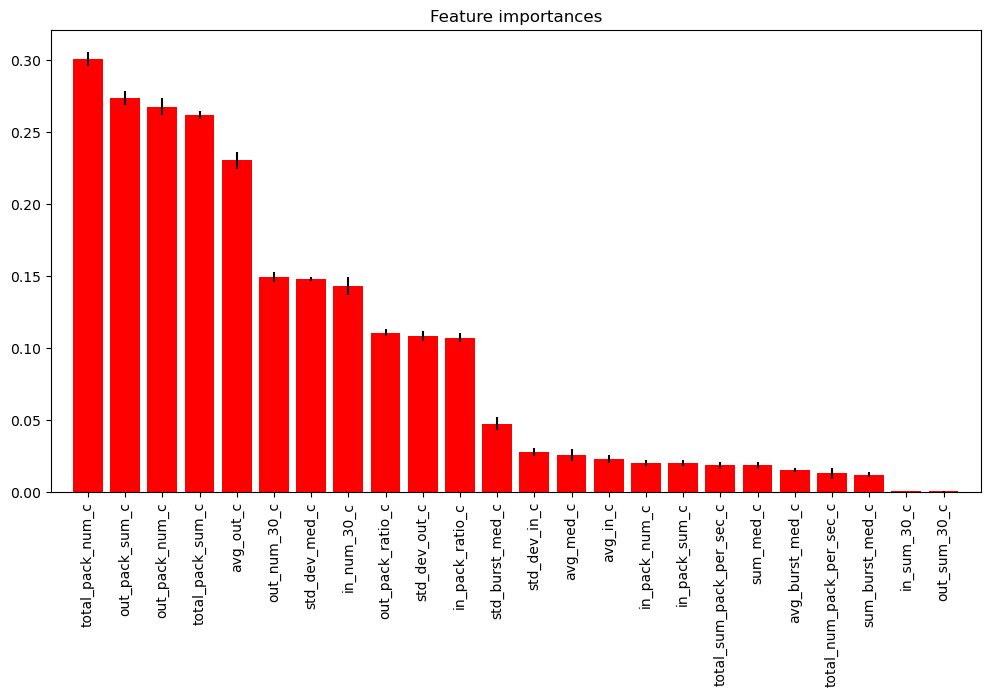

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Permutation Importance Results
importances = perm.feature_importances_
std = perm.feature_importances_std_
indices = np.argsort(importances)[::-1]

# Draw the feature importance graph
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

## Drop Features under feature inportance=0.1
> number of final features = 11

In [45]:
new_features = X.drop(
    ['std_burst_med_c', 'std_dev_in_c', 'avg_med_c', 'avg_in_c', 'in_pack_num_c', 'in_pack_sum_c',
    'total_sum_pack_per_sec_c', 'sum_med_c', 'avg_burst_med_c', 'total_num_pack_per_sec_c', 
    'sum_burst_med_c', 'in_sum_30_c', 'out_sum_30_c'], axis=1)

In [46]:
print(new_features.head())

   std_dev_out_c  avg_out_c  out_pack_num_c  in_pack_ratio_c  \
0         0.4936     0.6810          0.1318           0.1153   
1         0.3388     0.8419          0.0427           0.2600   
2         0.4748     0.6887          0.1256           0.1195   
3         0.4954     0.6836          0.1343           0.1132   
4         0.4572     0.6881          0.1309           0.1090   

   out_pack_ratio_c  total_pack_num_c  total_pack_sum_c  out_pack_sum_c  \
0            0.8847            0.1379            0.8745          0.8682   
1            0.7400            0.0471            0.9618          0.9573   
2            0.8805            0.1315            0.8806          0.8744   
3            0.8868            0.1404            0.8721          0.8657   
4            0.8910            0.1364            0.8748          0.8691   

   std_dev_med_c  in_num_30_c  out_num_30_c  
0         0.0597       0.3576        0.6424  
1         0.0477       0.3576        0.6424  
2         0.0656       0.2

## Split the data

In [47]:
# split train and test data
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = new_features, y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Train the Model(K-NN)
> With new features

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
model_knn = KNeighborsClassifier()
model_name = 'KNN'

model_knn.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluate

In [49]:
# Test the trained model using testing data and report the accuracy and confusion matrix.
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model_knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"[Confusion Matrix]\n {conf_matrix}")

Accuracy: 0.5847368421052631
[Confusion Matrix]
 [[23  0  0 ...  0  0  1]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 1  0  4 ... 13  0  1]
 [ 0  0  0 ...  0 29  0]
 [ 1  0  0 ...  0  0 13]]


/Users/joonghyeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Hyperparameter Tuning
> using GridSerchCV

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']
             }

grid_search = GridSearchCV(model_knn, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

/Users/joonghyeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/joonghyeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Score:  0.6464473684210527


In [65]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy after Tuning: {acc}")

Accuracy after Tuning: 0.6489473684210526


## Evaluate

In [62]:
# calculate the evaluate metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, classification_report, f1_score

import matplotlib.pyplot as plt

# precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: ", precision)

# weighted F1-score
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("Weighted-average F1-score: ", f1_weighted)

# classification report
print(f'--- KNN ---')
print(classification_report(y_test, y_pred))

Precision:  0.6479169872135028
Weighted-average F1-score:  0.6429889395231054
--- KNN ---
              precision    recall  f1-score   support

           0       0.64      0.57      0.61        40
           1       0.88      0.63      0.73        46
           2       0.56      0.80      0.66        35
           3       0.62      0.86      0.72        36
           4       0.82      0.78      0.80        46
           5       0.66      0.83      0.74        30
           6       0.79      0.74      0.77        42
           7       0.69      0.73      0.71        37
           8       0.68      0.59      0.63        32
           9       0.56      0.44      0.49        50
          10       0.63      0.56      0.59        43
          11       0.44      0.41      0.42        34
          12       0.73      0.77      0.75        35
          13       0.49      0.46      0.47        37
          14       0.57      0.49      0.53        43
          15       0.59      0.62      0.60  

## Baseline

In [64]:
import numpy as np

classes = np.unique(y_test)
random_predictions = np.random.choice(classes, size=len(y_test))
accuracy = (random_predictions == y_test).mean()

print(f"Baseline accuracy by random guessing: {accuracy}")

Baseline accuracy by random guessing: 0.010526315789473684
